In [9]:
import numpy as np 
import pandas as pd 
from scipy import stats    
import matplotlib.pyplot as plt 
import seaborn as sns     # 시각화
from sklearn import preprocessing
import warnings
warnings.filterwarnings( 'ignore' )    # 빨간 경고창 제거

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# TDM(Term-Documnet Matrix): row-vocab / column-file name
TDM = pd.read_csv("C:/Users/alstj/OneDrive/바탕 화면/패럿/TDM.txt", sep = '\t', index_col = 0)

# 파일의 library는 개인마다 다르다 (심지어 맥/윈도우도 다름) --> google에 물어보면 됨

In [12]:
TDM

,01.txt,02.txt,03.txt,04.txt
14th,0,0,0,1
15,0,0,0,1
1656,0,0,0,1
1761,0,0,0,1
17th,0,0,0,1
...,...,...,...,...
years,2,0,0,0
york,0,0,1,0
you,4,0,0,0
young,0,1,0,0


In [13]:
print(TDM.shape)

(244, 4)


In [17]:
print(TDM.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 14th to your
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   01.txt  244 non-null    int64
 1   02.txt  244 non-null    int64
 2   03.txt  244 non-null    int64
 3   04.txt  244 non-null    int64
dtypes: int64(4)
memory usage: 9.5+ KB
None


In [18]:
#TDM.head()
#TDM.tail()

In [28]:
# 기술통계: 수치 척도
# 기본적으로 column기준(axis=0)으로 연산되며, 출력결과는 Series(1차원) 
# method(axis = , skipna = True): nan값이 있을 때 제외하고 연산함
#TDM.sum()           # TDM.apply(sum)
#TDM.sum(axis = 1)   # TDM.apply(sum, axis = 1)
#TDM.mean()
#TDM.median()
#TDM.var()
#TDM.std(axis=1)

In [34]:
# idxmax(), idxmin(): 최대/최솟값의 index 추출, axis=0(열 기준) 연산 default, 출력결과 Series
# 최댓값/최솟값이 중복일 때는 먼저 나온 index가 출력됨(행 기준 위쪽, 열 기준 왼쪽) #
#TDM.idxmax()   
#TDM.idxmax(axis=1)  
#TDM.idxmin()
#TDM.idxmin(axis=1)

In [41]:
TDM.describe()      # 기술통계량, dataFrame으로 출력
#TDM.describe().loc['75%'].sub(TDM.describe().loc['25%'])   # IQR(사분위수)

,01.txt,02.txt,03.txt,04.txt
count,244.000000,244.000000,244.000000,244.000000
mean,0.348361,0.356557,0.516393,0.491803
std,0.778807,0.647818,1.152800,0.833910
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,11.000000,5.000000


In [43]:
# 선택
#TDM.describe()[['01.txt','03.txt']]
#TDM.describe().iloc[:,[0,2]]
#TDM.describe().loc['mean']
#TDM.describe().iloc[2]

01.txt    0.778807
02.txt    0.647818
03.txt    1.152800
04.txt    0.833910
Name: std, dtype: float64

In [46]:
TDM.isnull()
#TDM.isnull().sum()

,01.txt,02.txt,03.txt,04.txt
14th,False,False,False,False
15,False,False,False,False
1656,False,False,False,False
1761,False,False,False,False
17th,False,False,False,False
...,...,...,...,...
years,False,False,False,False
york,False,False,False,False
you,False,False,False,False
young,False,False,False,False


In [48]:
# 연산
b = TDM.loc[['a', 'an','the', 'of', 'to']]
c = b.iloc[::-2,::-2]

In [49]:
b

,01.txt,02.txt,03.txt,04.txt
a,1,2,2,3
an,0,2,1,0
the,4,3,7,4
of,2,1,4,1
to,4,5,11,5


In [50]:
c

,04.txt,02.txt
to,5,5
the,4,3
a,3,2


In [57]:
# b+c
# b.add(c)
# b.add(c, fill_value = 0)  # row명 오름차순, column명 오름차순, float
# b.sub(c, fill_value = 0)
# b.mul(c, fill_value = 0)
# b.div(c, axis = 1, fill_value = 0)    # c -> Series일 때 Series의 index와 match되어 연산됨

,01.txt,02.txt,03.txt,04.txt
a,NaN,4.0,NaN,6.0
an,NaN,NaN,NaN,NaN
of,NaN,NaN,NaN,NaN
the,NaN,6.0,NaN,8.0
to,NaN,10.0,NaN,10.0


In [ ]:
# apply(function, axis=0): axis=0(열) 연산이 default
# applymap(function): 전체 값에 적용되는 연산

In [25]:
#b
#b.apply(sum)            # 각 열의 value들의 합
#b.apply(sum, axis=1)    # 각 행의 value들의 합
#b.apply(lambda x: max(x) - min(x))    # 각 열의 최댓값-최솟값 

01.txt     4
02.txt     4
03.txt    10
04.txt     5
dtype: int64

In [81]:
b.applymap(float)

,01.txt,02.txt,03.txt,04.txt
a,1.0,2.0,2.0,3.0
an,0.0,2.0,1.0,0.0
the,4.0,3.0,7.0,4.0
of,2.0,1.0,4.0,1.0
to,4.0,5.0,11.0,5.0


In [82]:
#groupby
fruit = pd.DataFrame({
    'city': ['부산', '부산', '부산', '부산', '서울', '서울', '서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100, 200, 250, 300, 150, 200, 400],
    'quantity': [1, 2, 3, 4, 5, 6, 7]
})
fruit

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [83]:
fruit.groupby('city').mean()

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


In [84]:
fruit.groupby(['city', 'fruits']).mean()

price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

In [85]:
fruit.groupby(['fruits','city']).mean()

price  quantity
fruits city                 
apple  부산    100.0       1.0
       서울    175.0       5.5
banana 부산    275.0       3.5
       서울    400.0       7.0
orange 부산    200.0       2.0

In [86]:
df = pd.DataFrame({'col_1':[1,2],
                   'col_2':[3,4]},
                  index={'one','two'})
df

,col_1,col_2
one,1,3
two,2,4


In [87]:
stacked = df.stack()
stacked

one  col_1    1
     col_2    3
two  col_1    2
     col_2    4
dtype: int64

In [88]:
stacked=pd.DataFrame(stacked)
stacked

0
one col_1  1
    col_2  3
two col_1  2
    col_2  4

In [89]:
stacked.unstack()     # stacked.unstack(level=1)

0      
    col_1 col_2
one     1     3
two     2     4

In [90]:
stacked.unstack(level=0)

0    
      one two
col_1   1   2
col_2   3   4

In [91]:
# 타이타닉 데이터 불러오기
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [92]:
grd_sur = titanic.groupby(['pclass','sex'])[['survived','age','fare']].mean()
grd_sur

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [93]:
s_titanic = grd_sur.stack(dropna=True)
s_titanic

pclass  sex             
1       female  survived      0.968085
                age          34.611765
                fare        106.125798
        male    survived      0.368852
                age          41.281386
                fare         67.226127
2       female  survived      0.921053
                age          28.722973
                fare         21.970121
        male    survived      0.157407
                age          30.740707
                fare         19.741782
3       female  survived      0.500000
                age          21.750000
                fare         16.118810
        male    survived      0.135447
                age          26.507589
                fare         12.661633
dtype: float64

In [94]:
# pclass: 1, sex: female에 대한 정보
pd.DataFrame(s_titanic[1]['female'])

,0
survived,0.968085
age,34.611765
fare,106.125798


In [95]:
# pclass: 1, sex: female에 대한 정보
# survived, fare --column
s_titanic[1, 'female'][['survived', 'fare']]

survived      0.968085
fare        106.125798
dtype: float64

In [96]:
s_titanic

pclass  sex             
1       female  survived      0.968085
                age          34.611765
                fare        106.125798
        male    survived      0.368852
                age          41.281386
                fare         67.226127
2       female  survived      0.921053
                age          28.722973
                fare         21.970121
        male    survived      0.157407
                age          30.740707
                fare         19.741782
3       female  survived      0.500000
                age          21.750000
                fare         16.118810
        male    survived      0.135447
                age          26.507589
                fare         12.661633
dtype: float64

In [100]:
# survived, age, fare의 index를 다시 column으로
s_titanic.unstack(level = -1)
# s_titanic.unstack(level=2)

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [101]:
# level: 1 (=pclass) 을 column으로
s_titanic.unstack(level=0)
# s_titanic.unstack(level='pclass')

pclass                    1          2          3
sex                                              
female survived    0.968085   0.921053   0.500000
       age        34.611765  28.722973  21.750000
       fare      106.125798  21.970121  16.118810
male   survived    0.368852   0.157407   0.135447
       age        41.281386  30.740707  26.507589
       fare       67.226127  19.741782  12.661633

In [102]:
grd_sur = grd_sur[['survived']]
grd_sur

survived
pclass sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

<AxesSubplot:ylabel='pclass-sex'>

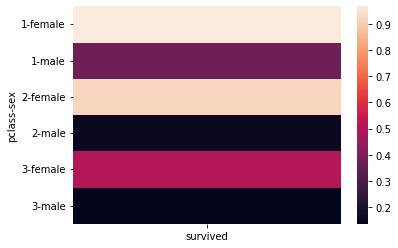

In [107]:
# heatmap
# stack을 하지 않았을 때
sns.heatmap(grd_sur)

In [108]:
grd_sur.unstack(0)

survived                    
pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-pclass', ylabel='sex'>

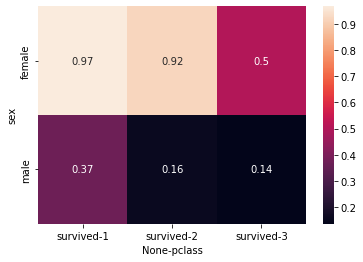

In [109]:
# pclass별 생존율 히트맵 시각화
sns.heatmap(grd_sur.unstack(0), annot=True)

In [110]:
# pivot
p = pd.DataFrame([
    [20220901,'A',10],
    [20220901,'B',100],
    [20220901,'C',1000],
    [20220902,'A',20],
    [20220902,'B',200],
    [20220902,'C',2000],
    [20220903,'A',30],
    [20220903,'B',300],
    [20220903,'C',3000]
], columns=['Date','Typecode','Volumne'
])
p

,Date,Typecode,Volumne
0,20220901,A,10
1,20220901,B,100
2,20220901,C,1000
3,20220902,A,20
4,20220902,B,200
5,20220902,C,2000
6,20220903,A,30
7,20220903,B,300
8,20220903,C,3000


In [111]:
p_pivoted1 = p.pivot(index='Date', columns='Typecode', values='Volumne')
p_pivoted1 

Typecode,A,B,C
Date,,,
20220901,10,100,1000
20220902,20,200,2000
20220903,30,300,3000


In [112]:
p_pivoted2=pd.pivot_table(p, index='Date', columns='Typecode', values='Volumne')
p_pivoted2

Typecode,A,B,C
Date,,,
20220901,10,100,1000
20220902,20,200,2000
20220903,30,300,3000


In [132]:
type(None)

NoneType

In [133]:
type(np.nan)

float

In [134]:
np.nan+np.nan

nan

In [135]:
None+None

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [136]:
np.isnan(np.nan)

True

In [137]:
np.isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# 적용하기

In [150]:
import numpy as np
#np.random.seed(1) #시드 고정
df = pd.DataFrame(np.random.choice([' ', None, 'apple', 'banana', 'orange'],
                                  30, replace = True,
                                  p = [0.05,0.15,0.25,0.25,0.30]).reshape(10,3),
                 index = list('abcdefghij'),
                 columns = list('ABC'))
df

,A,B,C
a,banana,apple,orange
b,None,apple,orange
c,None,banana,banana
d,orange,apple,None
e,orange,orange,orange
f,orange,,apple
g,banana,orange,orange
h,banana,orange,banana
i,apple,banana,banana
j,banana,orange,orange


In [151]:
df.C.value_counts()
#df.C.value_counts().idxmax()

orange    5
banana    3
apple     1
Name: C, dtype: int64

In [152]:
# 결측치 여부 확인 1
#df.isnull()
#df.isnull().sum()
#df.loc[df.isnull()['A']]

In [153]:
# 결측치 채우기 1
# df = df.dropna(axis =0) #결측치 있는 행이나 열 제거
df['A'].fillna(df['A'].value_counts().idxmax(), inplace = True)
df['C'].fillna(df['C'].value_counts().idxmin(), inplace = True)
df

,A,B,C
a,banana,apple,orange
b,banana,apple,orange
c,banana,banana,banana
d,orange,apple,apple
e,orange,orange,orange
f,orange,,apple
g,banana,orange,orange
h,banana,orange,banana
i,apple,banana,banana
j,banana,orange,orange


In [154]:
# 결측치spacebar 여부 확인 2
df.loc[df.values==' ']
#df.loc[df.B == ' ']

,A,B,C
f,orange,,apple


In [155]:
# 결측치 채우기 2
#df.replace(' ', 'orange', inplace = True)
df['B'].replace(' ', df['B'].value_counts().idxmax(), inplace = True)
df

,A,B,C
a,banana,apple,orange
b,banana,apple,orange
c,banana,banana,banana
d,orange,apple,apple
e,orange,orange,orange
f,orange,orange,apple
g,banana,orange,orange
h,banana,orange,banana
i,apple,banana,banana
j,banana,orange,orange


# 결측치
----
### None
존재하지 않음, 비어있음, Null을 뜻함. dtype은 NoneType  
데이터가 비어있기에 계산할 수 없음. 함수 또한 적용이 불가능.

### NaN (Not a Number)
특정 숫자로 표현할 수 없음 을 뜻함. dtype은 float  
데이터가 있기 때문에 계산을 할 수 있음. 함수 또한 적용 가능함.

#### None과 NaN은 완전히 다른 개념
#### <span style = 'background-color: #f7ddbe'>Pandas는 때에 따라서 None을 자동으로 NaN으로 변환시킨다

In [157]:
# random sampling
# 이항분포: np.random.binomial(n,p,size)
# 포아송분포: np.random.poisson(lam, size)
# 정규분포: np.random.normal(mu, sigma, size)
# t분포: np.random.standard_t(df, size)
# 균등분포: np.random,uniform(low, high, size)
# F-분포: np.random.f(dfnum, dfden, size)
# 카이제곱분포: np.random.chisquare(df,size)

# 시각화

데이터를 분석하는 것 또한 중요하지만, 데이터를 알아보기 쉽게 하는 것 또한 중요하다.

In [158]:
# !pip install chufflinks

In [159]:
import cufflinks as cf
cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


In [172]:
# Numpy로 난수를 발생시키고 시각화하기
a = pd.DataFrame(np.random.randn(10,3).cumsum(axis=0),
                 columns = ['A','B','C'], index = np.arange(0,100,10))
a
#a.plot()

,A,B,C
0,0.679301,1.427547,0.036197
10,2.709299,0.793142,-0.488906
20,3.097033,0.438343,0.688146
30,2.455925,1.761037,0.882321
40,5.021378,1.296923,0.679627
50,5.167030,-0.884105,1.281893
60,5.647876,-0.774787,-0.262503
70,4.101315,-0.188169,0.912675
80,5.695780,-1.083610,-0.118123
90,5.423841,-3.059340,-0.707054


In [173]:
b = pd.Series(np.random.normal(0,1, size = 200))
b
#b.plot()

0      0.851790
1      1.634603
2      0.279155
3      1.640554
4      0.410873
         ...   
195   -0.727476
196   -1.023799
197    0.567765
198    1.504522
199   -0.578427
Length: 200, dtype: float64

<AxesSubplot:>

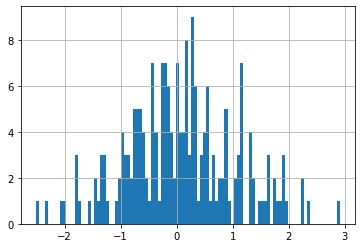

In [174]:
# histogram
b.hist(bins=100)

<AxesSubplot:>

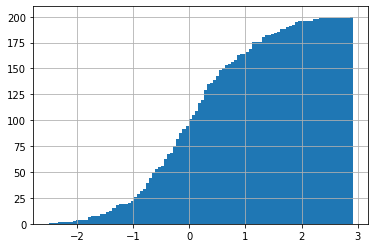

In [175]:
b.hist(bins=100, cumulative = True)

In [181]:
# scatter
x = np.concatenate([np.random.normal(1,2, size = (100,1)), np.random.uniform(0,4, size = (100,1))], axis =1)
scat = pd.DataFrame(x, columns=['x1','x2'])
scat.head()
#plt.scatter(scat['x1'], scat['x2'])

,x1,x2
0,4.838338,2.607903
1,1.955789,0.954064
2,0.840520,0.102160
3,-2.041492,2.945029
4,-0.335860,1.307167


In [183]:
# 역대 미국 대통령/정당 data
df = pd.read_csv('PresidentsParty.csv', index_col = 0)

In [184]:
df

,President,Party
Years,,
1789,George Washington,None
1793,George Washington,None
1797,John Adams,Federalist
1801,Thomas Jefferson,Democratic-Republican
1805,Thomas Jefferson,Democratic-Republican
...,...,...
2005,George W. Bush,Republican
2009,Barack Obama,Democrat
2013,Barack Obama,Democrat


In [185]:
# Party level별 빈도값 구하기
party = df.Party.value_counts()
party

Republican               24
Democrat                 23
Democratic-Republican     7
Whig                      3
None                      2
Federalist                1
National Union            1
Name: Party, dtype: int64

<AxesSubplot:ylabel='Party'>

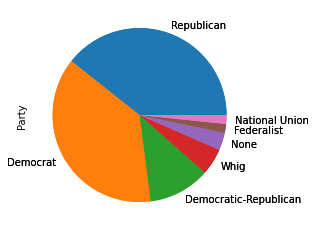

In [186]:
party.plot(kind='pie')
party.plot.pie()

Text(0, 0.5, 'Party')

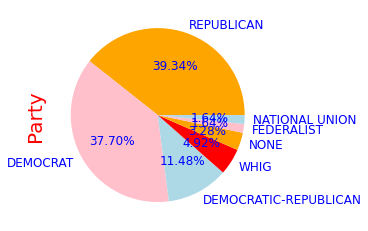

In [187]:
#party.plot(kind='pie')
#party.plot.pie()
party.plot.pie(textprops={'fontsize':12, 'color':'blue'},
           colors= ['orange','pink','lightblue','red'],
           labels = [i.upper() for i in party.index], autopct = '%0.2f%%')
plt.ylabel(party.name, fontsize = 20, color = 'red')

<AxesSubplot:>

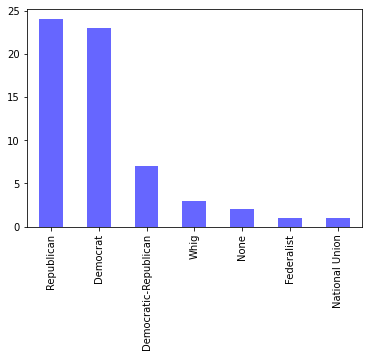

In [188]:
party.plot(kind='bar', color = 'blue', alpha = 0.6)    # alpha: 투명도
#party.plot.bar(color = 'blue', alpha = 0.6)

<AxesSubplot:>

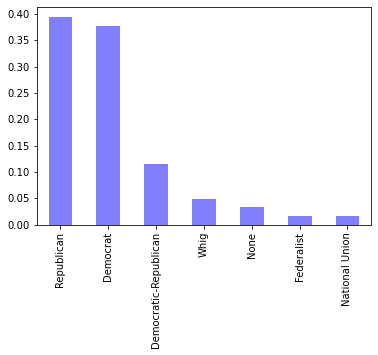

In [190]:
# Series party의 값을 상대빈도로 변환
party.apply(lambda x: x/party.sum())
party.apply(lambda x: x/party.sum()).plot.bar(color='blue', alpha = 0.5)

In [196]:
# 1. 동일 인명 대통령의 취임횟수(1회/2회/3회)를 산출하여 시각화
df['President'].value_counts()
#df['President'].value_counts().value_counts()

Franklin Roosevelt        3
George Washington         2
Dwight D. Eisenhower      2
Ulysses S. Grant          2
Grover Cleveland          2
Richard M. Nixon          2
Woodrow Wilson            2
Ronald Reagan             2
Bill Clinton              2
George W. Bush            2
Barack Obama              2
Andrew Jackson            2
Theodore Roosevelt        2
James Monroe              2
James Madison             2
Thomas Jefferson          2
Harry S. Truman           2
Calvin Coolidge           1
Herbert Hoover            1
Jimmy Carter              1
John F. Kennedy           1
Lyndon B. Johnson         1
George Bush               1
Donald Trump              1
Warren G. Harding         1
Benjamin Harrison         1
William Howard Taft       1
Franklin Pierce           1
John Quincy Adams         1
Martin Van Buren          1
William Henry Harrison    1
John Tyler                1
James K. Polk             1
Zachary Taylor            1
James Buchanan            1
William McKinley    

([<matplotlib.axis.XTick at 0x16f6922c340>,
 [Text(0, 0, '1time'), Text(1, 0, '2time'), Text(2, 0, '3time')])

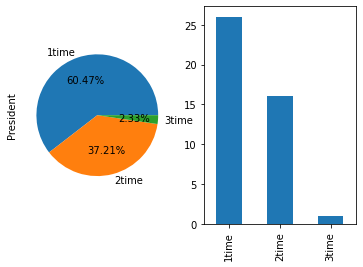

In [201]:
a = df['President'].value_counts().value_counts()
plt.subplot(1,2,1)
a.plot.pie(labels = [str(i) + 'time' for i in a.index],
          autopct = '%0.2f%%')
plt.subplot(1,2,2)
a.plot.bar()
plt.xticks(range(3), [str(i) + 'time' for i in a.index])

<AxesSubplot:>

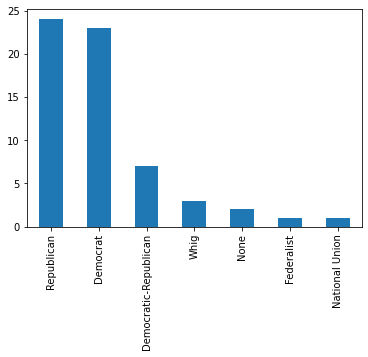

In [202]:
# 2-1. 정당별 bar plot 만들기
df.Party.value_counts().plot.bar()

<AxesSubplot:ylabel='Party'>

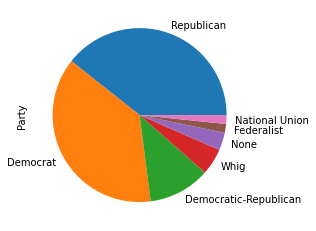

In [203]:
# 2-2. 정당별 pie chart 만들기
df.Party.value_counts().plot.pie()

<AxesSubplot:>

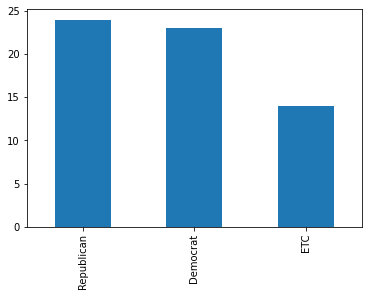

In [86]:
# 3-1. Republican과 Democrat을 제외한 정당을 모두 ETC로 변환하여 bar plot으로 나타내기
# ~: not
df.Party[~df.Party.isin(['Republican', 'Democrat'])] = 'ETC'
# df
df.Party.value_counts().plot.bar()

<AxesSubplot:ylabel='Party'>

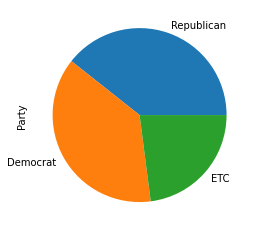

In [204]:
# 3-2. Republican과 Democrat을 제외한 정당을 모두 ETC로 변환하여 pie chart로 나타내기
# ~: not
df.Party[~df.Party.isin(['Republican', 'Democrat'])] = 'ETC'
# df
df.Party.value_counts().plot.pie()

In [209]:
# 4. 상위 계층: Party, 하위 계층: 취임횟수 DataFrame
b = df.groupby(['Party', 'President']).size().groupby('Party').value_counts()
pd.DataFrame(b)

0
Party           
Democrat   1   8
           2   6
           3   1
ETC        1   6
           2   4
Republican 1  12
           2   6

In [213]:
# unstack: 이원분할 빈도 교차표
c = b.unstack().fillna(0).astype('int')
c

,1,2,3
Party,,,
Democrat,8,6,1
ETC,6,4,0
Republican,12,6,0


<AxesSubplot:ylabel='Party'>

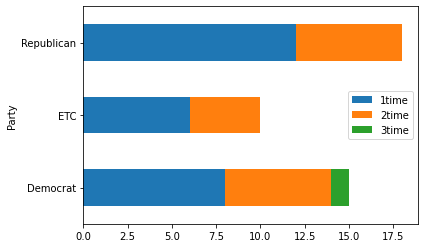

In [214]:
c.columns = [str(i) + 'time' for i in c.columns]
c.plot.barh(stacked = True)